Name: Ahmet Boran Özüm
Student Id: 2380814

In [205]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import scipy.signal
import time

In [11]:
chessboard = cv2.imread('chessboard.png')
agac = cv2.imread('agac.png')
chessboard_rotated = cv2.imread('chessboardrotated.png')
agac_rotated = cv2.imread('agacrotated.png')
lab = cv2.imread('lab.png')
lab_rotated = cv2.imread('labrotated.png')

In [8]:
shift_kernels = {
    "left": np.array([[0,0,0],[0,0,1],[0,0,0]]),
    "right": np.array([[0,0,0],[1,0,0],[0,0,0]]),
    "up": np.array([[0,0,0],[0,0,0],[0,1,0]]),
    "down": np.array([[0,1,0],[0,0,0],[0,0,0]]),
    "up-left": np.array([[0,0,0],[0,0,0],[0,0,1]]),
    "up-rigtt": np.array([[0,0,0],[0,0,0],[1,0,0]]),
    "down-left": np.array([[0,0,1],[0,0,0],[0,0,0]]),
    "down-right": np.array([[1,0,0],[0,0,0],[0,0,0]])
}

### Task 1: Naive Formula + Uniform Weighting

In [186]:
def naive_uniform(original_img):
    img_copy = original_img.copy()
    img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
    
    window = np.ones((3,3))
    
    res = np.zeros(img_gray.shape)
#     for key, value in shift_kernels.items():
# #         shift = (img_gray - scipy.signal.convolve2d(img_gray, value, mode='same', boundary='symm'))**2
# #         res += scipy.signal.convolve2d(shift, window, mode='same', boundary='fill', fillvalue=0)

#         org = cv2.filter2D(src=img_gray, ddepth=-1, kernel=window)
#         shift = cv2.filter2D(src=img_gray, ddepth=-1, kernel=value)
#         shift = cv2.filter2D(src=shift, ddepth=-1, kernel=window)
        
#         dif = (org-shift)**2
        
#         res += dif

    for y in range(2,len(img_gray)-2):
        for x in range(2,len(img_gray[0])-2):
            
            total_sum = 0
            original_window = img_gray[y-1:y+2, x-1:x+2]
            for u in range(-1,2,2):
                for v in range(-1,2,2):
                    shifted_window = img_gray[y+u-1:y+u+2, x+v-1: x+v+2]
                    diff = original_window-shifted_window
                    diff_squared = np.square(diff)
                    total_sum += np.sum(diff_squared)
            
            res[y][x] = total_sum
            
                
    flatten_img = res.flatten()
    max_ind = np.argpartition(flatten_img, -10)[-10:]
    x_idx, y_idx = np.unravel_index(max_ind, res.shape)
    for x, y, in zip(x_idx, y_idx):
        cv2.circle(img_copy, [y,x], 3, (255, 0, 0), -1)
    
    return img_copy

Time elapsed for chessboard 1.340209


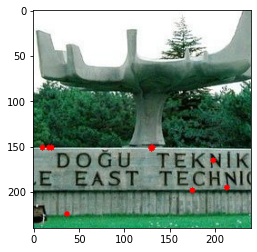

In [207]:
## Write your code here

# fig = plt.figure(figsize=(10,20))

# rows = 3
# columns = 2

# fig.add_subplot(rows, columns, 1)
start = time.time()
plt.imshow(naive_uniform(agac))
end = time.time()

print('Time elapsed for chessboard %f' % (end-start))
# fig.add_subplot(rows, columns, 2)
# plt.imshow(naive_uniform(chessboard_rotated))

# fig.add_subplot(rows, columns, 3)
# naive_uniform(chessboard_rotated)

# fig.add_subplot(rows, columns, 4)
# plt.imshow(naive_uniform(agac_rotated))

# fig.add_subplot(rows, columns, 5)
# plt.imshow(naive_uniform(lab))

# fig.add_subplot(rows, columns, 6)
# plt.imshow(naive_uniform(lab_rotated))

In [ ]:
## This part is for discussion



### Task2: Naive Formula + Uniform Weighting + Non-Maximum Suppression

In [196]:
## Write your code here

def naive_uniform_nonmax(original_img):
    img_copy = original_img.copy()
    img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
    
    window = np.ones((3,3))
    
    res = np.zeros(img_gray.shape)
#     for key, value in shift_kernels.items():
# #         shift = (img_gray - scipy.signal.convolve2d(img_gray, value, mode='same', boundary='symm'))**2
# #         res += scipy.signal.convolve2d(shift, window, mode='same', boundary='fill', fillvalue=0)

#         org = cv2.filter2D(src=img_gray, ddepth=-1, kernel=window)
#         shift = cv2.filter2D(src=img_gray, ddepth=-1, kernel=value)
#         shift = cv2.filter2D(src=shift, ddepth=-1, kernel=window)
        
#         dif = (org-shift)**2
        
#         res += dif

    for y in range(2,len(img_gray)-2):
            for x in range(2,len(img_gray[0])-2):

                total_sum = 0
                original_window = img_gray[y-1:y+2, x-1:x+2]
                for u in range(-1,2,2):
                    for v in range(-1,2,2):
                        shifted_window = img_gray[y+u-1:y+u+2, x+v-1: x+v+2]
                        diff = original_window-shifted_window
                        diff_squared = np.square(diff)
                        total_sum += np.sum(diff_squared)

                res[y][x] = total_sum
    
    for y in range(10,len(res)-10):
        for x in range(10,len(res[0])-10):
            local_max = 0
            max_x = 0
            max_y = 0
            
            for u in range(-10,11):
                for v in range(-10,11):
                    if res[y+u][x+v] >= local_max:
                        local_max = res[y+u][x+v]
                        max_y = y+u
                        max_x = x+v
                    res[y+u][x+v] = 0
            
            res[max_y][max_x] = local_max
    plt.imshow(res)      
                    
    
    flatten_img = res.flatten()
    max_ind = np.argpartition(flatten_img, -10)[-10:]
    x_idx, y_idx = np.unravel_index(max_ind, res.shape)
    for x, y, in zip(x_idx, y_idx):
        cv2.circle(img_copy, [y,x], 3, (255, 0, 0), -1)
    
    return img_copy


Time elapsed for agac 15.212052


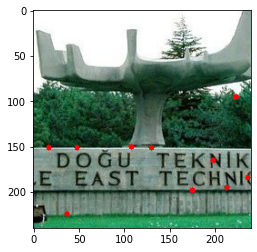

In [209]:
# fig = plt.figure(figsize=(10,20))

# rows = 3
# columns = 2

# fig.add_subplot(rows, columns, 1)
# plt.imshow(naive_uniform_nonmax(chessboard))

# fig.add_subplot(rows, columns, 2)
# plt.imshow(naive_uniform_nonmax(chessboard_rotated))

start = time.time()
plt.imshow(naive_uniform_nonmax(agac))
end = time.time()

print('Time elapsed for agac %f' % (end-start))

# fig.add_subplot(rows, columns, 4)
# plt.imshow(naive_uniform_nonmax(agac_rotated))

# fig.add_subplot(rows, columns, 5)
# plt.imshow(naive_uniform_nonmax(lab))

# fig.add_subplot(rows, columns, 6)
# plt.imshow(naive_uniform_nonmax(lab_rotated))

In [ ]:
## This part is for discussion



### Task3: Taylor's Approximation + Uniform Weighting + Non-Maximum Suppression

In [210]:
## Write your code here

sobel_x = np.array([[-1,0,1], [-2,0,2], [-1,0,1]])
sobel_y = sobel_x.T

def taylor_uniform_nonmax(original_img):
    img_copy = original_img.copy()
    img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
    
    I_x = cv2.filter2D(src=img_gray, ddepth=-1, kernel=sobel_x)
    I_y = cv2.filter2D(src=img_gray, ddepth=-1, kernel=sobel_y)
    I_x_I_y = I_x*I_y
    I_x_squared = np.square(I_x)
    I_y_squared = np.square(I_y)
    
    res = np.zeros(img_gray.shape)
    for y in range(2,len(res)-2):
        for x in range(2,len(res[0])-2):
            total_sum = 0
            ix = I_x_squared[y-1:y+2, x-1:x+2]
            iy = I_y_squared[y-1:y+2, x-1:x+2]
            ixiy = I_x_I_y[y-1:y+2, x-1:x+2]
                
            for u in range(-1,2,2):
                for v in range(-1,2,2):
                    for wy in range(3):
                        for wx in range(3):
                            H = np.array([[ix[wy][wx], ixiy[wy][wx]], [ixiy[wy][wx], iy[wy][wx]]])
                            mul = np.matmul(np.array([u,v]), H)
                            mul = np.matmul(mul, np.array([[u],[v]]))
                            total_sum = mul[0]
            
            res[y][x] = total_sum
            
    for y in range(10,len(res)-10):
        for x in range(10,len(res[0])-10):
            local_max = 0
            max_x = 0
            max_y = 0
            
            for u in range(-10,11):
                for v in range(-10,11):
                    if res[y+u][x+v] >= local_max:
                        local_max = res[y+u][x+v]
                        max_y = y+u
                        max_x = x+v
                    res[y+u][x+v] = 0
            
            res[max_y][max_x] = local_max
    plt.imshow(res)  
            
    flatten_img = res.flatten()
    max_ind = np.argpartition(flatten_img, -10)[-10:]
    x_idx, y_idx = np.unravel_index(max_ind, res.shape)
    for x, y, in zip(x_idx, y_idx):
        cv2.circle(img_copy, [y,x], 3, (255, 0, 0), -1)
    
    return img_copy

Time elapsed for chessboard 15.687982
Time elapsed for rotated chessboard 15.681424
Time elapsed for agac 15.478786
Time elapsed for rotated agac 15.080179
Time elapsed for lab 15.032405
Time elapsed for rotated lab 15.377142


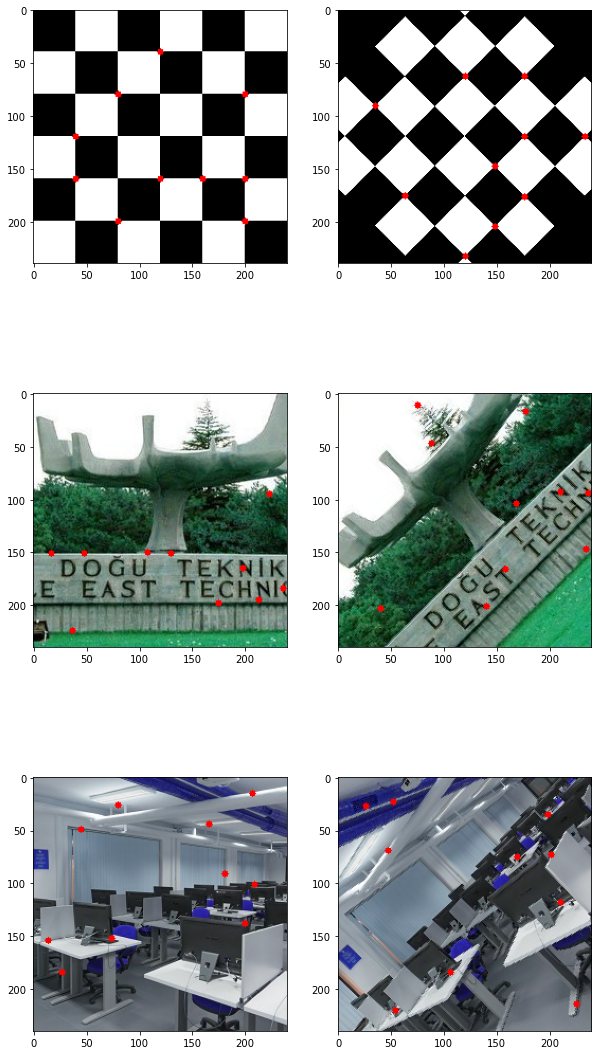

In [211]:
fig = plt.figure(figsize=(10,20))

rows = 3
columns = 2

fig.add_subplot(rows, columns, 1)
start = time.time()
plt.imshow(naive_uniform_nonmax(chessboard))
end = time.time()

# print('Time elapsed for chessboard %f' % (end-start))

fig.add_subplot(rows, columns, 2)
start = time.time()
plt.imshow(naive_uniform_nonmax(chessboard_rotated))
end = time.time()

# print('Time elapsed for rotated chessboard %f' % (end-start))

fig.add_subplot(rows, columns, 3)
start = time.time()
plt.imshow(naive_uniform_nonmax(agac))
end = time.time()

# print('Time elapsed for agac %f' % (end-start))

fig.add_subplot(rows, columns, 4)
start = time.time()
plt.imshow(naive_uniform_nonmax(agac_rotated))
end = time.time()

# print('Time elapsed for rotated agac %f' % (end-start))

fig.add_subplot(rows, columns, 5)
start = time.time()
plt.imshow(naive_uniform_nonmax(lab))
end = time.time()

# print('Time elapsed for lab %f' % (end-start))

fig.add_subplot(rows, columns, 6)
start = time.time()
plt.imshow(naive_uniform_nonmax(lab_rotated))
end = time.time()

# print('Time elapsed for rotated lab %f' % (end-start))

In [ ]:
## This part is for discussion



### Task 4: Smaller Eigenvalue as corner score + Uniform Weighting + Non-Maximum Suppression

In [ ]:
## Write your code here


In [ ]:
## This part is for discussion



### Task 5: R function as corner score + Uniform Weighting + Non-Maximum Suppression

In [ ]:
## Write your code here


In [ ]:
## This part is for discussion



### Task 6: R function with fast windowing based on fitering + Uniform Weighting + Non-Maximum Suppression

In [ ]:
## Write your code here


In [ ]:
## This part is for discussion



### Task 7: R function with fast windowing based on fitering + Gaussian Weighting + Non-Maximum Suppression

In [ ]:
## Write your code here


In [ ]:
## This part is for discussion

